In [22]:
import helium
import pandas as pd
import time
from selenium.webdriver.common.by import By
from sqlalchemy import create_engine


def get_data():
    url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/3monthly_s1.php?prec_no=45&block_no=47682&year=2024&month=7&day=13&view='
    browser = helium.start_chrome(url, headless=False)  # headless=Falseでブラウザを表示
    time.sleep(5)  # ページの読み込み時間を増やす
    
    # 特定のセレクタからデータを取得
    table_selector = '#tablefix1'
    table = browser.find_element(By.CSS_SELECTOR, table_selector)
    
    if table:
        df = pd.read_html(table.get_attribute('outerHTML'))[0]
        # 必要な列だけを選択
        df_filtered = df.iloc[[1,8], [0, 3, 21]]
        df_filtered.columns = ['月～月', '降水量(mm)', '雪(cm)']
        #--を0に変換
        df_filtered = df_filtered.replace('--', 0)
    else:
        df_filtered = pd.DataFrame(columns=['月～月', '降水量(mm)', '雪(cm)'])  
        
    
    browser.quit()
    return df_filtered

def save_to_db(df):
    # SQLiteデータベースに接続
    engine = create_engine('sqlite:///weathertiba_data.db')
    # データフレームをデータベースに保存
    df.to_sql('weather', con=engine, if_exists='replace', index=False)

def display_db():
    # SQLiteデータベースに接続
    engine = create_engine('sqlite:///weathertiba_data.db')
    # データベースからデータを読み込む
    df = pd.read_sql('weather', con=engine)
    # データを整形して表示
    print(df.to_string(index=False))

def main():
    df = get_data()
    save_to_db(df)
    display_db()

# main関数を呼び出す
if __name__ == "__main__":
    main()

 月～月  降水量(mm) 雪(cm)
12～2    125.0     3
 7～9    472.0     0


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/2804847880.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table.get_attribute('outerHTML'))[0]


In [23]:
import helium
import pandas as pd
import time
from selenium.webdriver.common.by import By
from sqlalchemy import create_engine


def get_data():
    url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/3monthly_s1.php?prec_no=54&block_no=47604&year=2024&month=12&day=13&view=p1'
    browser = helium.start_chrome(url, headless=False)  # headless=Falseでブラウザを表示
    time.sleep(5)  # ページの読み込み時間を増やす
    
    # 特定のセレクタからデータを取得
    table_selector = '#tablefix1'
    table = browser.find_element(By.CSS_SELECTOR, table_selector)
    
    if table:
        df = pd.read_html(table.get_attribute('outerHTML'))[0]
        # 必要な列だけを選択
        df_filtered = df.iloc[[1,8], [0, 3, 21]]
        df_filtered.columns = ['月～月', '降水量(mm)', '雪(cm)']
        #--を0に変換
        df_filtered = df_filtered.replace('--', 0)
    else:
        df_filtered = pd.DataFrame(columns=['月～月', '降水量(mm)', '雪(cm)'])  # テーブルが見つからない場合は空のデータフレームを返す
    
    browser.quit()
    return df_filtered

def save_to_db(df):
    # SQLiteデータベースに接続
    engine = create_engine('sqlite:///weatherniigata_data.db')
    # データフレームをデータベースに保存
    df.to_sql('weather', con=engine, if_exists='replace', index=False)

def display_db():
    # SQLiteデータベースに接続
    engine = create_engine('sqlite:///weatherniigata_data.db')
    # データベースからデータを読み込む
    df = pd.read_sql('weather', con=engine)
    # データを整形して表示
    print(df.to_string(index=False))

def main():
    df = get_data()
    save_to_db(df)
    display_db()

# main関数を呼び出す
if __name__ == "__main__":
    main()

 月～月  降水量(mm) 雪(cm)
12～2    610.5    73
 7～9    710.5     0


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/2529733351.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table.get_attribute('outerHTML'))[0]


In [24]:
import pandas as pd

# CSVファイルのパス
file1 = '/Users/aoshimaryouta/DSprog2/最終課題/1.csv'
file2 = '/Users/aoshimaryouta/DSprog2/最終課題/2.csv'
file3 = '/Users/aoshimaryouta/DSprog2/最終課題/12.csv'

# 必要な列だけを読み込む
usecols = ['地域コード', '県名', '交通事故件数']

# ファイルを開いてエンコーディングエラーを無視しながら読み込む関数
def read_csv_ignore_errors(file_path):
    with open(file_path, encoding='utf-8', errors='ignore') as f:
        return pd.read_csv(f, header=2, usecols=usecols)

# CSVファイルを読み込む
df1 = read_csv_ignore_errors(file1)
df2 = read_csv_ignore_errors(file2)
df3 = read_csv_ignore_errors(file3)


# データフレームを結合する
merged_df = pd.concat([df1, df2, df3])

# 新潟県のデータを抽出する
niigata_df = merged_df[merged_df['県名'] == '新潟']

# 交通事故件数の列からカンマを削除して数値に変換する
niigata_df['交通事故件数'] = niigata_df['交通事故件数'].str.replace(',', '').astype(int)

# 抽出したデータフレームを表示する
print(niigata_df)

# 新潟県のデータをCSVファイルに保存する
niigata_df.to_csv('niigata_accidents_winter.csv', index=False)



   地域コード  県名  交通事故件数
21    15  新潟    2490
21    15  新潟     254
21    15  新潟     457


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/1426592677.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niigata_df['交通事故件数'] = niigata_df['交通事故件数'].str.replace(',', '').astype(int)


In [26]:
import pandas as pd

# CSVファイルのパス
file1 = '/Users/aoshimaryouta/DSprog2/最終課題/7.csv'
file2 = '/Users/aoshimaryouta/DSprog2/最終課題/8.csv'
file3 = '/Users/aoshimaryouta/DSprog2/最終課題/9.csv'

# 必要な列だけを読み込む
usecols = ['地域コード', '県名', '交通事故件数']

# ファイルを開いてエンコーディングエラーを無視しながら読み込む関数
def read_csv_ignore_errors(file_path):
    with open(file_path, encoding='utf-8', errors='ignore') as f:
        return pd.read_csv(f, header=2, usecols=usecols)

# CSVファイルを読み込む
df1 = read_csv_ignore_errors(file1)
df2 = read_csv_ignore_errors(file2)
df3 = read_csv_ignore_errors(file3)


# データフレームを結合する
merged_df = pd.concat([df1, df2, df3])

# 新潟県のデータを抽出する
niigata_df = merged_df[merged_df['県名'] == '新潟']

# 交通事故件数の列からカンマを削除して数値に変換する
niigata_df['交通事故件数'] = niigata_df['交通事故件数'].str.replace(',', '').astype(int)

# 抽出したデータフレームを表示する
print(niigata_df)

# 新潟県のデータをCSVファイルに保存する
niigata_df.to_csv('niigata_accidents_summer.csv', index=False)

   地域コード  県名  交通事故件数
21    15  新潟    1485
21    15  新潟    1697
21    15  新潟    1913


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/2402291107.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niigata_df['交通事故件数'] = niigata_df['交通事故件数'].str.replace(',', '').astype(int)


In [27]:
import pandas as pd

# CSVファイルのパス
file1 = '/Users/aoshimaryouta/DSprog2/最終課題/1.csv'
file2 = '/Users/aoshimaryouta/DSprog2/最終課題/2.csv'
file3 = '/Users/aoshimaryouta/DSprog2/最終課題/12.csv'

# 必要な列だけを読み込む
usecols = ['地域コード', '県名', '交通事故件数']

# ファイルを開いてエンコーディングエラーを無視しながら読み込む関数
def read_csv_ignore_errors(file_path):
    with open(file_path, encoding='utf-8', errors='ignore') as f:
        return pd.read_csv(f, header=2, usecols=usecols)

# CSVファイルを読み込む
df1 = read_csv_ignore_errors(file1)
df2 = read_csv_ignore_errors(file2)
df3 = read_csv_ignore_errors(file3)


# データフレームを結合する
merged_df = pd.concat([df1, df2, df3])

# 千葉県のデータを抽出する
tiba_df = merged_df[merged_df['県名'] == '千葉']

# 交通事故件数の列からカンマを削除して数値に変換する
tiba_df['交通事故件数'] = tiba_df['交通事故件数'].str.replace(',', '').astype(int)

# 抽出したデータフレームを表示する
print(tiba_df)

# 千葉県のデータをCSVファイルに保存する
tiba_df.to_csv('tiba_accidents_winter.csv', index=False)

   地域コード  県名  交通事故件数
19    12  千葉   12160
19    12  千葉    1017
19    12  千葉    1958


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/3090137169.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiba_df['交通事故件数'] = tiba_df['交通事故件数'].str.replace(',', '').astype(int)


In [28]:
import pandas as pd

# CSVファイルのパス
file1 = '/Users/aoshimaryouta/DSprog2/最終課題/7.csv'
file2 = '/Users/aoshimaryouta/DSprog2/最終課題/8.csv'
file3 = '/Users/aoshimaryouta/DSprog2/最終課題/9.csv'

# 必要な列だけを読み込む
usecols = ['地域コード', '県名', '交通事故件数']

# ファイルを開いてエンコーディングエラーを無視しながら読み込む関数
def read_csv_ignore_errors(file_path):
    with open(file_path, encoding='utf-8', errors='ignore') as f:
        return pd.read_csv(f, header=2, usecols=usecols)

# CSVファイルを読み込む
df1 = read_csv_ignore_errors(file1)
df2 = read_csv_ignore_errors(file2)
df3 = read_csv_ignore_errors(file3)


# データフレームを結合する
merged_df = pd.concat([df1, df2, df3])

# 千葉県のデータを抽出する
tiba_df = merged_df[merged_df['県名'] == '千葉']

# 交通事故件数の列からカンマを削除して数値に変換する
tiba_df['交通事故件数'] = tiba_df['交通事故件数'].str.replace(',', '').astype(int)

# 抽出したデータフレームを表示する
print(tiba_df)

# 千葉県のデータをCSVファイルに保存する
tiba_df.to_csv('tiba_accidents_summer.csv', index=False)

   地域コード  県名  交通事故件数
19    12  千葉    7056
19    12  千葉    7943
19    12  千葉    8986


/var/folders/8h/0z8n_llj7cz2xdl2kzhls85c0000gn/T/ipykernel_37619/1378373528.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiba_df['交通事故件数'] = tiba_df['交通事故件数'].str.replace(',', '').astype(int)


In [29]:
# CSVファイルを読み込む
df1= pd.read_csv('niigata_accidents_summer.csv')
df2= pd.read_csv('niigata_accidents_winter.csv')
df3= pd.read_csv('tiba_accidents_summer.csv')
df4= pd.read_csv('tiba_accidents_winter.csv')

# 交通事故件数の合計を計算する
total_accidents1 = df1['交通事故件数'].sum()
total_accidents2 = df2['交通事故件数'].sum()
total_accidents3 = df3['交通事故件数'].sum()
total_accidents4 = df4['交通事故件数'].sum()

# 交通事故件数の合計を表示する
print('新潟の夏の交通事故件数の合計:', total_accidents1)
print('新潟の冬の交通事故件数の合計:', total_accidents2)
print('千葉の夏の交通事故件数の合計:', total_accidents3)
print('千葉の冬の交通事故件数の合計:', total_accidents4)

新潟の夏の交通事故件数の合計: 5095
新潟の冬の交通事故件数の合計: 3201
千葉の夏の交通事故件数の合計: 23985
千葉の冬の交通事故件数の合計: 15135


千葉県の冬の合計交通事故件数: 15135
千葉県の夏の合計交通事故件数: 23985
新潟県の冬の合計交通事故件数: 3201
新潟県の夏の合計交通事故件数: 5095


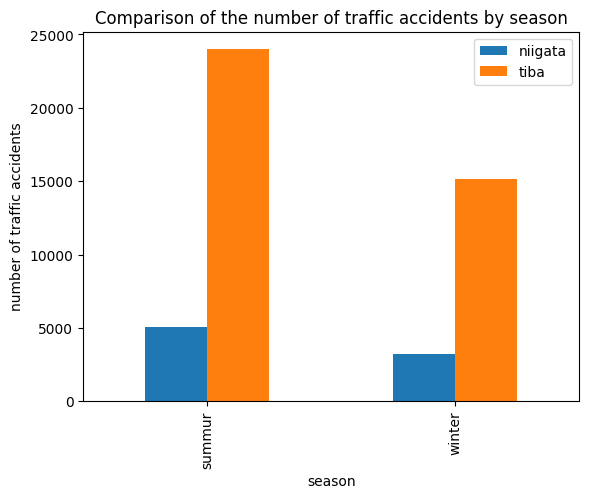

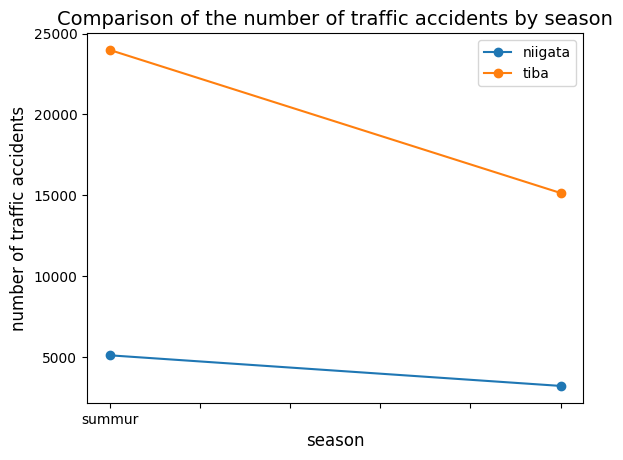

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# CSVファイルのパス
tiba_winter_file = '/Users/aoshimaryouta/DSprog2/最終課題/tiba_accidents_winter.csv'
tiba_summer_file = '/Users/aoshimaryouta/DSprog2/最終課題/tiba_accidents_summer.csv'
niigata_winter_file = '/Users/aoshimaryouta/DSprog2/最終課題/niigata_accidents_winter.csv'
niigata_summer_file = '/Users/aoshimaryouta/DSprog2/最終課題/niigata_accidents_summer.csv'

# CSVファイルを読み込む
tiba_winter_df = pd.read_csv(tiba_winter_file)
tiba_summer_df = pd.read_csv(tiba_summer_file)
niigata_winter_df = pd.read_csv(niigata_winter_file)
niigata_summer_df = pd.read_csv(niigata_summer_file)

# 交通事故件数の合計を計算する
tiba_winter_total = tiba_winter_df['交通事故件数'].sum()
tiba_summer_total = tiba_summer_df['交通事故件数'].sum()
niigata_winter_total = niigata_winter_df['交通事故件数'].sum()
niigata_summer_total = niigata_summer_df['交通事故件数'].sum()

# 合計を表示する
print(f'千葉県の冬の合計交通事故件数: {tiba_winter_total}')
print(f'千葉県の夏の合計交通事故件数: {tiba_summer_total}')
print(f'新潟県の冬の合計交通事故件数: {niigata_winter_total}')
print(f'新潟県の夏の合計交通事故件数: {niigata_summer_total}')

# データフレームを作成
data = {
    'season': ['summur', 'winter'],
    'niigata': [niigata_summer_total, niigata_winter_total],
    'tiba': [tiba_summer_total, tiba_winter_total]
}

df_season = pd.DataFrame(data)

# 棒グラフを作成
df_season.plot(x='season', y=['niigata', 'tiba'], kind='bar')
plt.title('Comparison of the number of traffic accidents by season')
plt.xlabel('season')
plt.ylabel('number of traffic accidents')
plt.show()

# 折れ線グラフを作成
df_season.plot(x='season', y=['niigata', 'tiba'], kind='line', marker='o')
plt.title(f"Comparison of the number of traffic accidents by season", fontsize=14)
plt.xlabel("season",fontsize=12)
plt.ylabel("number of traffic accidents",fontsize=12)
plt.show()



新潟の夏の交通事故件数の合計: 5095
新潟の冬の交通事故件数の合計: 3201
千葉の夏の交通事故件数の合計: 23985
千葉の冬の交通事故件数の合計: 15135


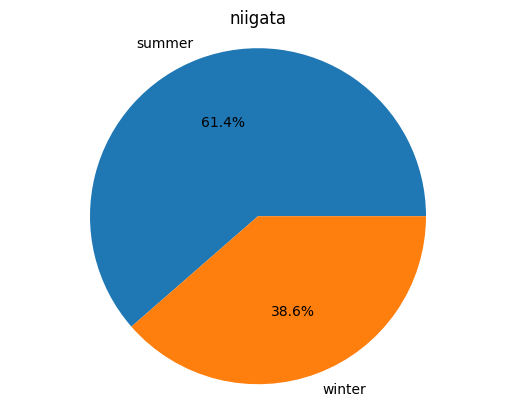

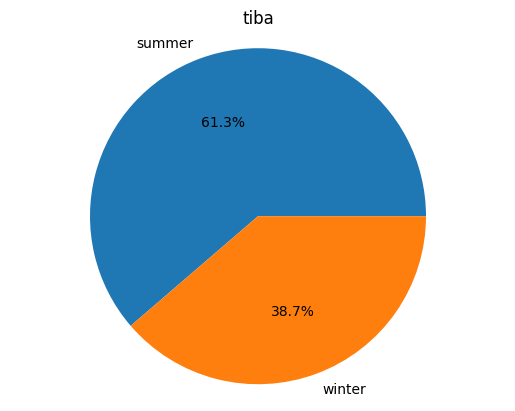

In [31]:
#千葉と新潟の交通事故件数の合計を比較する
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df1 = pd.read_csv('niigata_accidents_summer.csv')
df2 = pd.read_csv('niigata_accidents_winter.csv')
df3 = pd.read_csv('tiba_accidents_summer.csv')
df4 = pd.read_csv('tiba_accidents_winter.csv')

# 交通事故件数の合計を計算する
total_accidents1 = df1['交通事故件数'].sum()
total_accidents2 = df2['交通事故件数'].sum()
total_accidents3 = df3['交通事故件数'].sum()
total_accidents4 = df4['交通事故件数'].sum()

# 交通事故件数の合計を表示する
print('新潟の夏の交通事故件数の合計:', total_accidents1)
print('新潟の冬の交通事故件数の合計:', total_accidents2)
print('千葉の夏の交通事故件数の合計:', total_accidents3)
print('千葉の冬の交通事故件数の合計:', total_accidents4)

# データフレームを作成
data = {
    'season': ['summer', 'winter'],
    'niigata': [total_accidents1, total_accidents2],
    'tiba': [total_accidents3, total_accidents4]
}

df_season = pd.DataFrame(data)

#円グラフ
plt.pie(df_season['niigata'], labels=df_season['season'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('niigata')
plt.show()

plt.pie(df_season['tiba'], labels=df_season['season'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('tiba')
plt.show()



千葉県の冬の合計交通事故件数: 15135
千葉県の夏の合計交通事故件数: 23985
新潟県の冬の合計交通事故件数: 3201
新潟県の夏の合計交通事故件数: 5095
千葉県の降水量: 0    125.0
1    472.0
Name: 降水量(mm), dtype: float64
千葉県の積雪量: 0    3
1    0
Name: 雪(cm), dtype: object
新潟県の降水量: 0    610.5
1    710.5
Name: 降水量(mm), dtype: float64
新潟県の積雪量: 0    73
1     0
Name: 雪(cm), dtype: object


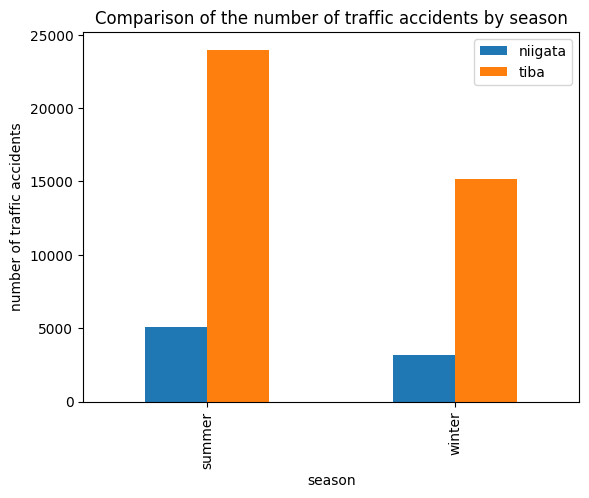

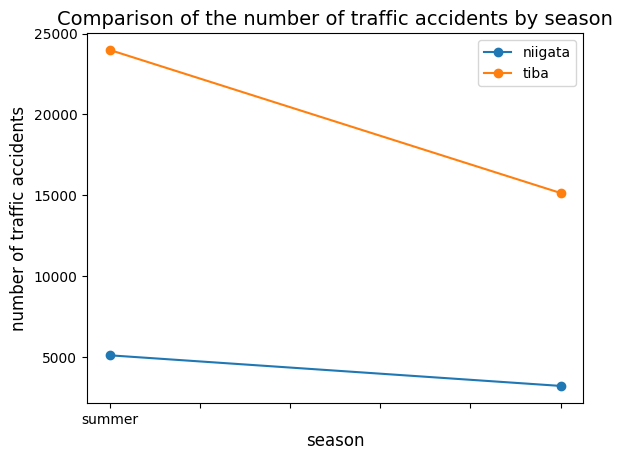

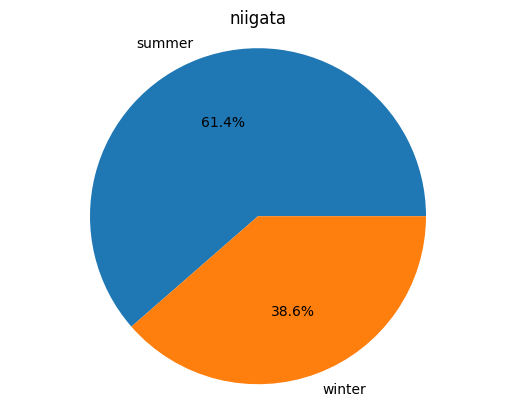

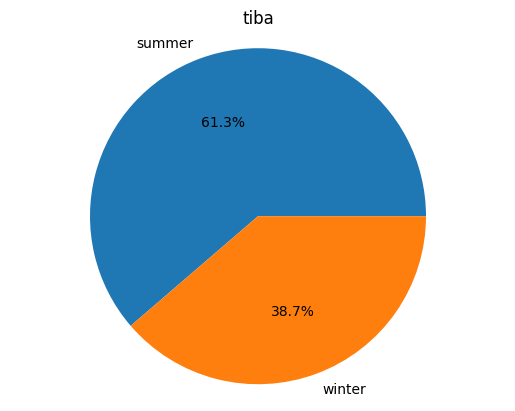

降水量と交通事故件数の相関係数: 1.0
雪と交通事故件数の相関係数: -1.0


ValueError: x and y must be the same size

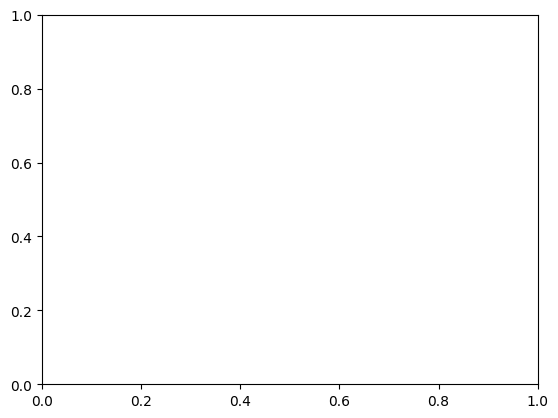

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
tiba_winter_file = '/Users/aoshimaryouta/DSprog2/最終課題/tiba_accidents_winter.csv'
tiba_summer_file = '/Users/aoshimaryouta/DSprog2/最終課題/tiba_accidents_summer.csv'
niigata_winter_file = '/Users/aoshimaryouta/DSprog2/最終課題/niigata_accidents_winter.csv'
niigata_summer_file = '/Users/aoshimaryouta/DSprog2/最終課題/niigata_accidents_summer.csv'

# CSVファイルを読み込む
tiba_winter_df = pd.read_csv(tiba_winter_file)
tiba_summer_df = pd.read_csv(tiba_summer_file)
niigata_winter_df = pd.read_csv(niigata_winter_file)
niigata_summer_df = pd.read_csv(niigata_summer_file)

# 交通事故件数の合計を計算する
tiba_winter_total = tiba_winter_df['交通事故件数'].sum()
tiba_summer_total = tiba_summer_df['交通事故件数'].sum()
niigata_winter_total = niigata_winter_df['交通事故件数'].sum()
niigata_summer_total = niigata_summer_df['交通事故件数'].sum()

print('千葉県の冬の合計交通事故件数:', tiba_winter_total)
print('千葉県の夏の合計交通事故件数:', tiba_summer_total)
print('新潟県の冬の合計交通事故件数:', niigata_winter_total)
print('新潟県の夏の合計交通事故件数:', niigata_summer_total)

# 降水量と雪のデータをDBから取得
# SQLiteデータベースに接続  
engine = create_engine('sqlite:///weathertiba_data.db')
# データベースからデータを読み込む
df = pd.read_sql('weather', con=engine) 
precipitation = df['降水量(mm)']
snowfall = df['雪(cm)']

print('千葉県の降水量:', precipitation)
print('千葉県の積雪量:', snowfall)

# 降水量と雪のデータをDBから取得
# SQLiteデータベースに接続
engine = create_engine('sqlite:///weatherniigata_data.db')
# データベースからデータを読み込む
df = pd.read_sql('weather', con=engine)
precipitation = df['降水量(mm)']
snowfall = df['雪(cm)']


print('新潟県の降水量:', precipitation)
print('新潟県の積雪量:', snowfall)

#グラフの作成
# データフレームを作成
data = {
    'season': ['summer', 'winter'],
    'niigata': [niigata_summer_total, niigata_winter_total],
    'tiba': [tiba_summer_total, tiba_winter_total]
}

df_season = pd.DataFrame(data)

# 棒グラフを作成
df_season.plot(x='season', y=['niigata', 'tiba'], kind='bar')
plt.title('Comparison of the number of traffic accidents by season')
plt.xlabel('season')
plt.ylabel('number of traffic accidents')
plt.show()

# 折れ線グラフを作成
df_season.plot(x='season', y=['niigata', 'tiba'], kind='line', marker='o')
plt.title(f"Comparison of the number of traffic accidents by season", fontsize=14)
plt.xlabel("season",fontsize=12)
plt.ylabel("number of traffic accidents",fontsize=12)
plt.show()

#円グラフ
plt.pie(df_season['niigata'], labels=df_season['season'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('niigata')
plt.show()

plt.pie(df_season['tiba'], labels=df_season['season'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('tiba')
plt.show()

# 相関係数を計算
correlation1 = df['降水量(mm)'].corr(pd.Series([niigata_summer_total, tiba_summer_total]))
correlation2 = df['雪(cm)'].corr(pd.Series([niigata_winter_total, tiba_winter_total]))

print('降水量と交通事故件数の相関係数:', correlation1)
print('雪と交通事故件数の相関係数:', correlation2)

# 降水量と雪のデータを用いて交通事故件数との関係を調べる
# 散布図を作成
plt.scatter(df['降水量(mm)'], niigata_summer_total, label='niigata')
plt.scatter(df['降水量(mm)'], tiba_summer_total, label='tiba')
plt.xlabel('precipitation')
plt.ylabel('number of traffic accidents')
plt.legend()
plt.show()

plt.scatter(df['雪(cm)'], niigata_winter_total, label='niigata')
plt.scatter(df['雪(cm)'], tiba_winter_total, label='tiba')
plt.xlabel('snowfall')
plt.ylabel('number of traffic accidents')
plt.legend()
plt.show()